<a href="https://colab.research.google.com/github/Angelina1225/DV-Lab-3/blob/master/Lab_3_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 71.3 MB/s eta 0:00:00


In [2]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.0 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113648 sha256=7dfff98b4f7713021b2c94c6fb08e22237eadc5f3c8dde363001f5d18fe7e59b
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


In [3]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
India_states = gpd.read_file("/content/drive/MyDrive/DV /L3/India States/Indian_states.shp")
capital_pop = pd.read_csv("/content/drive/MyDrive/DV /L3/state_capital_population.csv", encoding= 'unicode_escape')
India_states = India_states.merge(capital_pop, left_on='st_nm', right_on='State')
India_states.head()

,st_nm,geometry,State,Capital,Population
0,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",Assam,Dispur,953509
1,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",Bihar,Patna,1368295
2,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",Chhattisgarh,Raipur,708289
3,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",Goa,Panaji,141582
4,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",Gujarat,Gandhinagar,1570585


In [6]:
India_states.tail()

,st_nm,geometry,State,Capital,Population
25,Uttar Pradesh,"MULTIPOLYGON (((80.44802 24.99631, 80.44080 24...",Uttar Pradesh,Lucknow,2901067
26,Uttarakhand,"POLYGON ((79.21047 31.34846, 79.21386 31.34680...",Uttarakhand,Dehradun,696509
27,West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",West Bengal,Kolkata,10067072
28,Odisha,"MULTIPOLYGON (((86.38937 19.96351, 86.38840 19...",Odisha,Bhubaneswar,1994939
29,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",Andhra Pradesh,Amaravati,626732


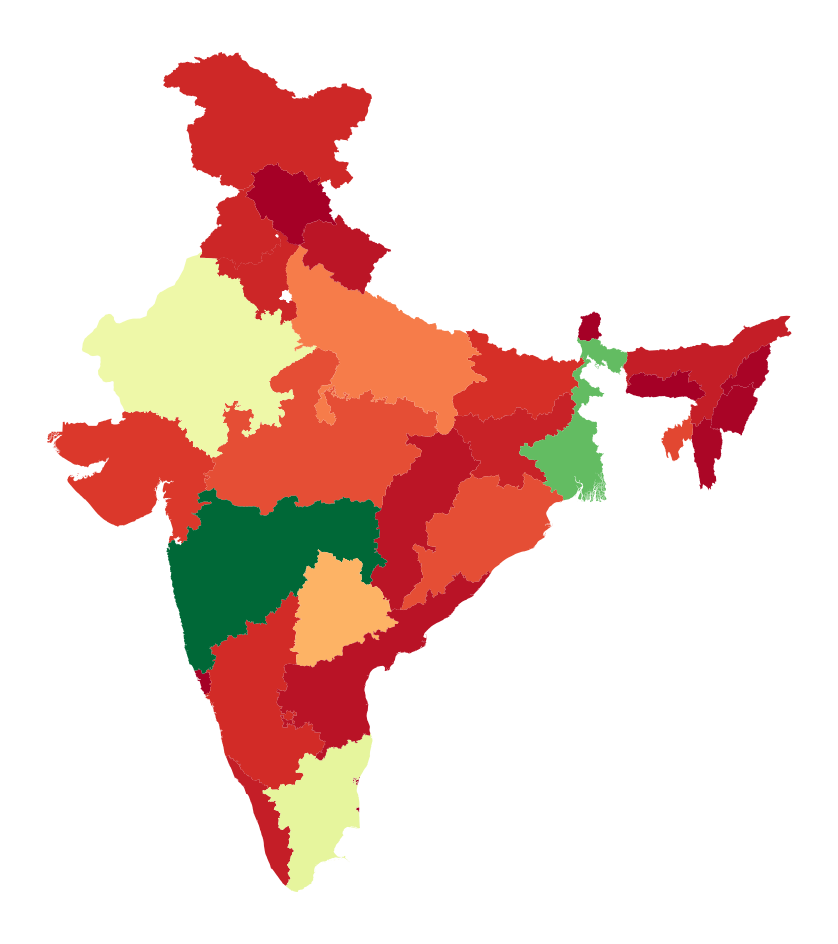

In [7]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
fig = India_states.plot(column='Population', cmap='RdYlGn', ax=ax)

<ipython-input-8-b00a3838d465>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for coor_x, coor_y, pop, cap in zip(India_states.geometry.centroid.x, India_states.geometry.centroid.y,
<ipython-input-8-b00a3838d465>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for coor_x, coor_y, pop, cap in zip(India_states.geometry.centroid.x, India_states.geometry.centroid.y,


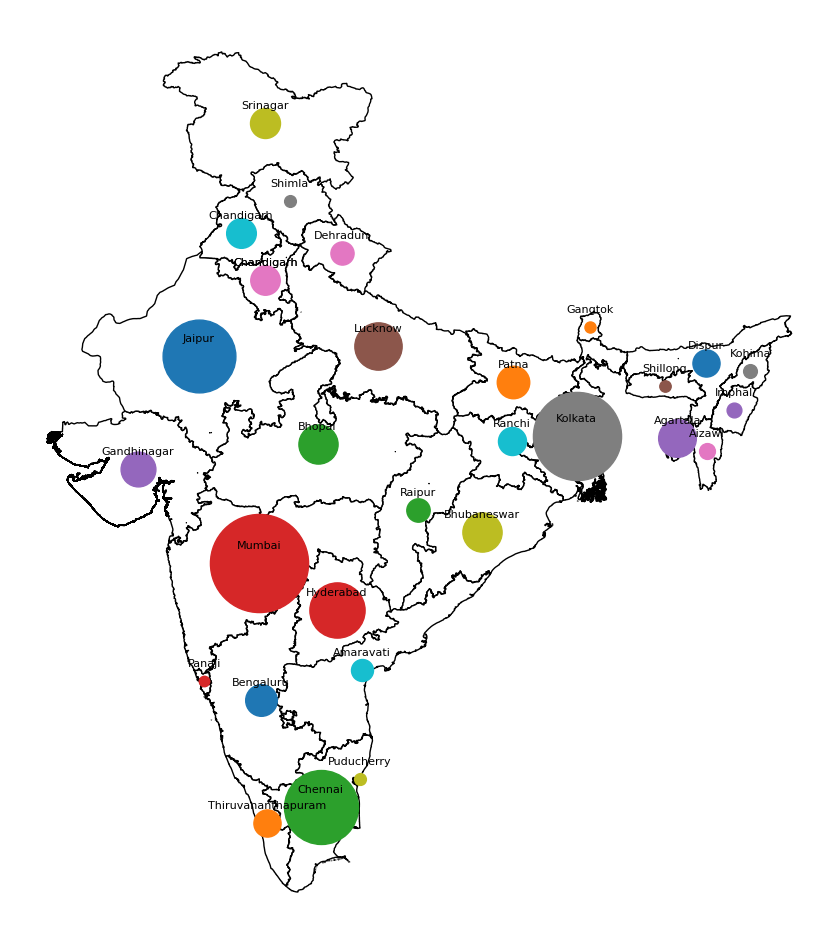

In [8]:
ax = India_states.plot(figsize=(12, 12), edgecolor='black', color = 'white', legend=True)

for coor_x, coor_y, pop, cap in zip(India_states.geometry.centroid.x, India_states.geometry.centroid.y, 
                                    India_states['Population'], India_states["Capital"]):
    ax.scatter(coor_x, coor_y, s = pop/2500)
    ax.annotate(cap, (coor_x, coor_y), textcoords="offset points", xytext=(0,10), ha='center', fontsize='8' )

ax.axis('off')
plt.show()

In [9]:
df = pd.read_excel("/content/drive/MyDrive/DV /L3/Flightschedule.xlsx")
df.head()

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight No,Effective From,EffectiveTo
0,Abu Dhabi,Ahmedabad,G8 76,21:40,18:15,19:05,Via DEL,F,G8 717,2023-02-12,2023-02-14
1,Abu Dhabi,Bagdogra,G8 76,21:40,08:25,09:15,Via DEL,Daily,G8 263,2023-02-12,2023-02-14
2,Abu Dhabi,Bangkok,G8 76,21:40,13:00,12:20,Via DEL,Daily,G8 37,2023-02-12,2023-03-24
3,Abu Dhabi,Bengaluru,G8 76,21:40,08:35,09:25,Via DEL,Daily,G8 113,2023-02-12,2023-02-14
4,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop,Daily,-,2023-02-12,2023-03-25


In [10]:
df = df[df["Routing"]=="Non Stop"]
df = df.reset_index()
df.head()

,index,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight No,Effective From,EffectiveTo
0,4,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop,Daily,-,2023-02-12,2023-03-25
1,7,Abu Dhabi,Kannur,G8 54,22:20,03:40,03:50,Non Stop,Daily,-,2023-02-12,2023-03-25
2,8,Abu Dhabi,Kochi,G8 64,23:30,05:00,04:00,Non Stop,"Tu,W,F,Su",-,2023-02-12,2023-02-22
3,66,Ahmedabad,Bengaluru,G8 804,21:10,23:25,02:15,Non Stop,Daily,-,2023-02-12,2023-03-25
4,67,Ahmedabad,Chandigarh,G8 911,08:10,10:10,02:00,Non Stop,"M,Tu,W,Th,F,Sa",-,2023-02-12,2023-02-15
